# Example 2.3: Monte Carlo simulation of stochastic time series with a given auto-spectral density
In this example, we will make realisations of a stochastic process with a given auto-spectral density. 

## Auto-spectral density

We start by defining the auto spectral density that we will consider in this example. The procedures shown can be used for any auto-spectral density. 

$$ S_X(\omega) =  \left\{ \begin{array}{c}  \sigma_x^2/(\omega_2-\omega_1) \quad  \omega_1 \le \omega \le \omega_2 \\ 0 \quad \omega<\omega_1 \\ 0 \quad \omega>\omega_2 \end{array} \right. $$

The auto-spectral density is defined and plotted below.

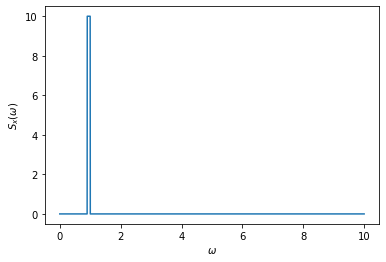

In [1]:
import numpy as np
from matplotlib import pyplot as plt
w1 = 0.9 # Low cut-off frequency
w2 = 1.0 # Low cut-off frequency
sigma_x= 1.0 # Standard deviation of the process
w = np.linspace(0.00001,10,10000); # Frequency axis
Sx = np.ones(w.shape[0])*sigma_x**2/(w2-w1) # Value of the auto-spectral density
Sx[w<w1] = 0 # Set the auto-spectral density to zero below w1
Sx[w>w2] = 0 # Set the auto-spectral density to zero above w2

plt.figure()
plt.plot(w,Sx);
plt.ylabel('$S_x(\omega)$');
plt.xlabel('$\omega$');

## Alternative 1: Sum of cosine terms
The following formula can obtain realizations of the stochastic process.

$$x(t) = \sum_{n=1}^{N}  A_k cos (\omega_kt + \phi_k) $$

$$A_k = \sqrt{2 S_x(\omega_k) \Delta \omega} $$

Here $S_x(\omega_k)$ is the auto-spectral density of the process, and $\phi_k$ is random phase angles evenly distributed between $0$ and $2\pi$

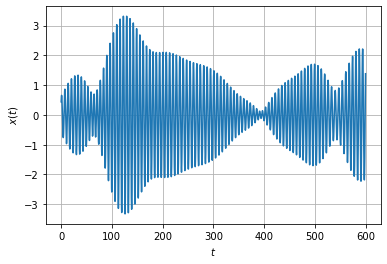

In [2]:
phi = np.random.rand(w.shape[0])*2*np.pi # Random phase angles 
t = np.linspace(0,600,6000) # Time vector
x = np.zeros(t.shape[0]) # Initialize the vector of x values
domega = w[1]-w[0] # Frequency spacing
for k in range(w.shape[0]):
    Ak = (2*Sx[k]*domega)**0.5 #Amplitude
    x = x + Ak * np.cos(w[k]*t+ phi[k]) # Sum the contibution from each harmonic component
    
plt.figure()
plt.plot(t,x);
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.grid()

## Alternative 2: The inverse fast Fourier transform (FFT)
It is possible to use IFFT to calculate the realizations of the stochastic process. This is a considerable advantage since this approach is much faster than the procedure shown above. We start by rewriting the expression above slightly

$$x(t) = \Re \left(\sum_{n=1}^{N}  A_k e^{i (\omega_kt + \phi_k)} \right)$$

$$x(t) = \Re \left(\sum_{n=1}^{N}  A_k e^{i \phi_k}e^{i \omega_kt}  \right)$$

Here we recognize the discrete inverse Fourier transform, and we can define

$$x(t) = \Re \left(IFFT \left( A_k e^{i \phi_k} \right) \right)$$

The cell below shows how to obtain a realizations of the stochastic process by using the iFFT.

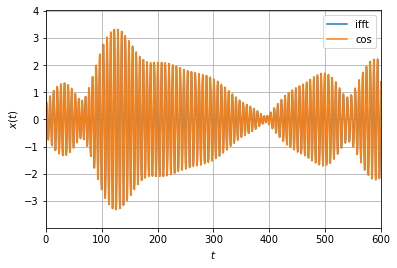

In [3]:
c = (2*Sx*domega)**0.5*np.exp(1j*phi) # The complex amplitude inclusing the phase angle
xifft = np.real(np.fft.ifft(c)*w.shape[0]) # The ifft
tifft = np.linspace(0,2*np.pi/domega,w.shape[0]) # time axis
plt.figure()
plt.plot(tifft,xifft,label = 'ifft')
plt.plot(t,x,label= 'cos');
plt.xlim((0,600));
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.grid()
plt.legend();


The figure above shows the realisation obtained by ifft compared to the time series obtained by summing cosinus terms. The time series are equal because the two methods are equal, and the same phase angles have been used to generate both. Try to use different phase angles by running the cells one more time and investigate how realisations differ.